In [386]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [387]:
df=pd.read_excel('/content/drive/MyDrive/flight.xlsx')

In [388]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [389]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [390]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [391]:
df.dropna(how='any',inplace=True)

In [392]:
df.shape

(10682, 11)

In [393]:
df.dropna(how='any',inplace=True)

In [394]:
df['Date_of_Journey'].dtype

dtype('O')

In [395]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [396]:
df['Date_of_Journey'].dtype

dtype('<M8[ns]')

In [397]:
df['day']=df['Date_of_Journey'].dt.day

In [398]:
df['month']=df['Date_of_Journey'].dt.month

In [399]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [400]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [401]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [402]:
df['Dep_Time'].dtype

dtype('O')

In [403]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])

In [404]:
df['dep_hour']=df['Dep_Time'].dt.hour

In [405]:
df['dep_minute']=df['Dep_Time'].dt.minute

In [406]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [407]:
df['arr_hour']=df['Arrival_Time'].dt.hour

In [408]:
df['arr_min']=df['Arrival_Time'].dt.minute

In [409]:
df.drop(columns=['Arrival_Time','Dep_Time'],inplace=True)

In [410]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,dep_hour,dep_minute,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [411]:
df['Duration'].astype(str)
li=list(df['Duration'])
duration=[]
def dur():
  for i in range(len(li)):
    z=li[i]
    if len(z.split(sep=' '))!=2:
      if 'h' in z:
        z=z.split(sep='h')[0]
        x=int(z)
        duration.append(60*x)
      else:
        z=z.split(sep='m')[0]
        x=int(z)
        duration.append(x)
    else:
      h=z.split(sep=' ')[0]
      h=h.split(sep='h')[0]
      h=int(h)
      m=z.split(sep=' ')[1]
      m=m.split(sep='m')[0]
      m=int(m)
      duration.append(60*h+m)



In [412]:
dur()
df['dur']=duration

In [413]:
df.drop('Duration',axis=1,inplace=True)

In [414]:
df['dur'].head()

0     170
1     445
2    1140
3     325
4     285
Name: dur, dtype: int64

In [415]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,dep_hour,dep_minute,arr_hour,arr_min,dur
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,285


In [416]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [417]:
stp=list(df['Total_Stops'])
stop=[]
for i in range(len(stp)):
  s=stp[i]
  if '1' in s:
    stop.append(1)
  elif '2' in s:
    stop.append(2)
  elif '3' in s:
    stop.append(3)
  else:
    stop.append(0)

df['stop']=stop

In [418]:
df.drop('Total_Stops',axis=1,inplace=True)

In [419]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [420]:
df['l_Souce']= label_encoder.fit_transform(df['Source'])

In [421]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [422]:
df['l_Destination']= label_encoder.fit_transform(df['Destination'])

In [423]:
df.drop('Route',axis=1,inplace=True)

In [424]:
df

,Airline,Source,Destination,Additional_Info,Price,day,month,dep_hour,dep_minute,arr_hour,arr_min,dur,stop,l_Souce,l_Destination
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,22,20,1,10,170,0,0,5
1,Air India,Kolkata,Banglore,No info,7662,5,1,5,50,13,15,445,2,3,0
2,Jet Airways,Delhi,Cochin,No info,13882,6,9,9,25,4,25,1140,2,2,1
3,IndiGo,Kolkata,Banglore,No info,6218,5,12,18,5,23,30,325,1,3,0
4,IndiGo,Banglore,New Delhi,No info,13302,3,1,16,50,21,35,285,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info,4107,4,9,19,55,22,25,150,0,3,0
10679,Air India,Kolkata,Banglore,No info,4145,27,4,20,45,23,20,155,0,3,0
10680,Jet Airways,Banglore,Delhi,No info,7229,27,4,8,20,11,20,180,0,0,2
10681,Vistara,Banglore,New Delhi,No info,12648,3,1,11,30,14,10,160,0,0,5


In [425]:
df1=df
df1['pricepermin']= df['Price']/df['dur']
df1

,Airline,Source,Destination,Additional_Info,Price,day,month,dep_hour,dep_minute,arr_hour,arr_min,dur,stop,l_Souce,l_Destination,pricepermin
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,22,20,1,10,170,0,0,5,22.923529
1,Air India,Kolkata,Banglore,No info,7662,5,1,5,50,13,15,445,2,3,0,17.217978
2,Jet Airways,Delhi,Cochin,No info,13882,6,9,9,25,4,25,1140,2,2,1,12.177193
3,IndiGo,Kolkata,Banglore,No info,6218,5,12,18,5,23,30,325,1,3,0,19.132308
4,IndiGo,Banglore,New Delhi,No info,13302,3,1,16,50,21,35,285,1,0,5,46.673684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info,4107,4,9,19,55,22,25,150,0,3,0,27.380000
10679,Air India,Kolkata,Banglore,No info,4145,27,4,20,45,23,20,155,0,3,0,26.741935
10680,Jet Airways,Banglore,Delhi,No info,7229,27,4,8,20,11,20,180,0,0,2,40.161111
10681,Vistara,Banglore,New Delhi,No info,12648,3,1,11,30,14,10,160,0,0,5,79.050000


In [426]:
df2 = df1.groupby('Airline')['pricepermin'].mean().to_frame().reset_index()
df2

,Airline,pricepermin
0,Air Asia,22.367336
1,Air India,19.653400
2,GoAir,22.430292
3,IndiGo,26.020414
4,Jet Airways,21.190357
5,Jet Airways Business,160.981808
6,Multiple carriers,18.653221
7,Multiple carriers Premium economy,20.521246
8,SpiceJet,25.774305
9,Trujet,21.230769


<BarContainer object of 12 artists>

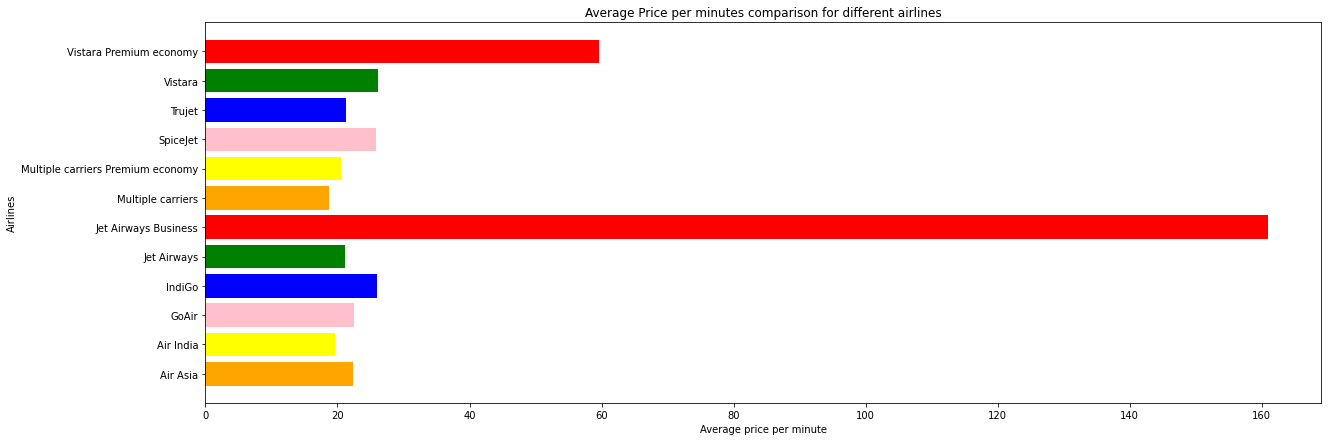

In [427]:
plt.figure(figsize=(20,7))
plt.title('Average Price per minutes comparison for different airlines')
plt.xlabel('Average price per minute')
plt.ylabel('Airlines')
plt.barh(df2['Airline'],df2['pricepermin'],color=['orange','yellow','pink','blue','green','red'])

Inferenece: price per minute for jet airways is far larger than other airlines

In [428]:

df94 = df.groupby('Airline')['pricepermin'].count().to_frame().reset_index()
df94


,Airline,pricepermin
0,Air Asia,319
1,Air India,1751
2,GoAir,194
3,IndiGo,2053
4,Jet Airways,3849
5,Jet Airways Business,6
6,Multiple carriers,1196
7,Multiple carriers Premium economy,13
8,SpiceJet,818
9,Trujet,1


Text(0.5, 1.0, 'Airlines composition')

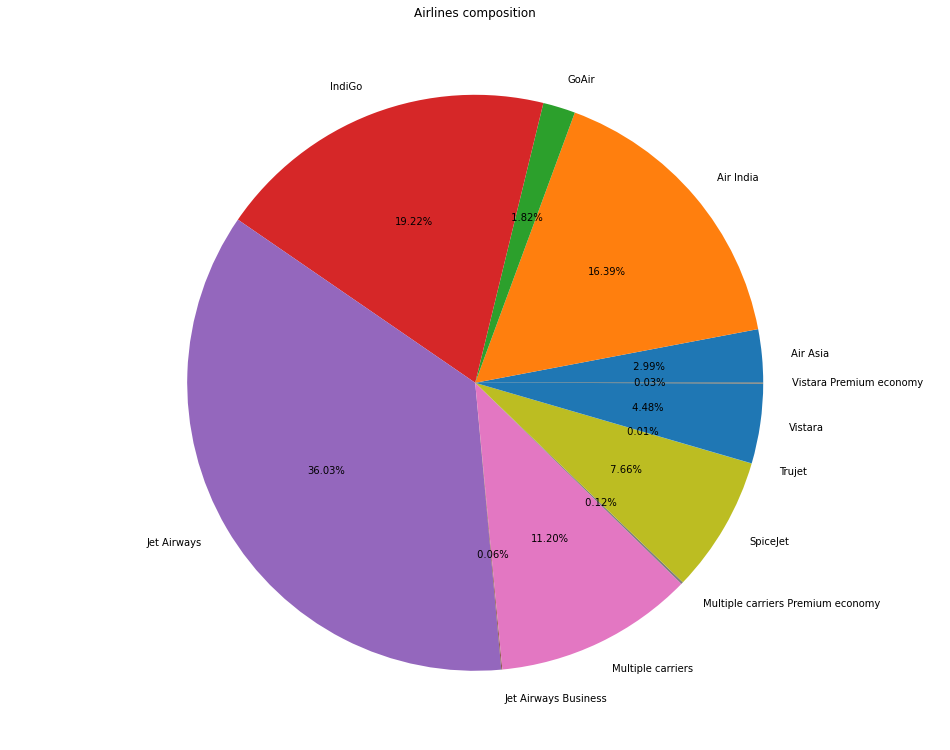

In [429]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
ax.axis('equal')

ax.pie(df94['pricepermin'], labels =df94['Airline'],autopct='%5.2f%%')
plt.title('Airlines composition')

Inference: Jet Airways compose more precent of the total airlines around 36 percentage

In [430]:
df4 = df.groupby('month')['pricepermin'].mean().to_frame().reset_index()
df4


,month,pricepermin
0,1,26.156713
1,3,23.240463
2,4,27.012410
3,5,19.320603
4,6,23.247685
5,9,20.514075
6,12,20.261531


Text(0.5, 1.0, 'Price comparison for different months')

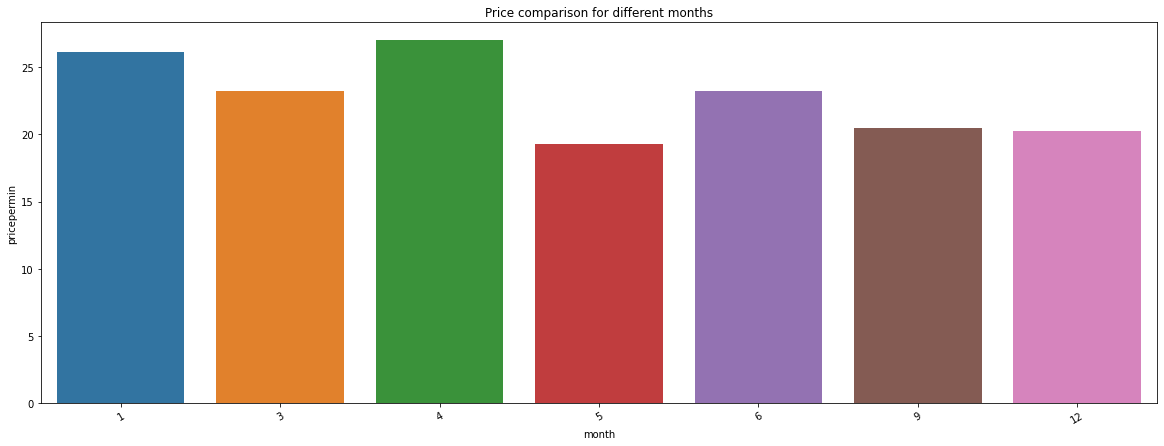

In [431]:
plt.figure(figsize=(20,7))
g=sns.barplot(x=df4['month'],y=df4['pricepermin'])
#g.set_xticklabels(labels=df['Airline'],rotation=40)
plt.xticks(rotation=30)
g.set_title('Price comparison for different months')

Inference: Average price per minutes is larger in month 1 and month 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


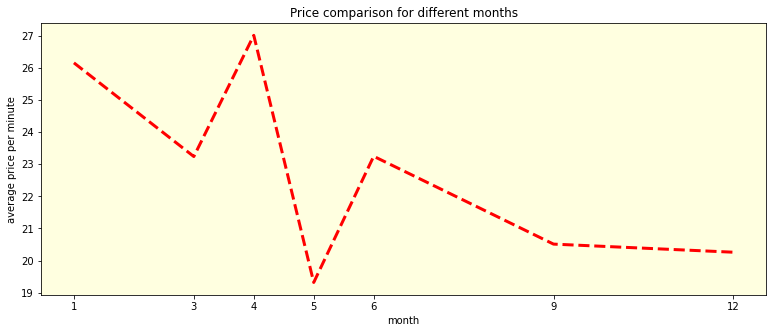

In [454]:
plt.plot(df4['month'],df4['pricepermin'],'m--',color='red',linewidth=3)
ax = plt.axes()
  

ax.set_facecolor("lightyellow")
plt.rcParams["figure.figsize"] = (13,5)
plt.title('Price comparison for different months')
plt.xlabel('month')
values = ['1','3','4','5','6','9','12'] 
plt.xticks(df4['month'],values)

plt.ylabel('average price per minute')
plt.show()

Inference: Average price per minutes is larger in month 1 and month 4

In [433]:
df31=df.loc[df['Airline']=='Jet Airways']
df33 = df31.groupby('month')['pricepermin'].mean().to_frame().reset_index()
df33


,month,pricepermin
0,1,23.843970
1,3,20.785123
2,4,33.701402
3,5,19.909993
4,6,22.330235
5,9,19.521198
6,12,19.287523


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


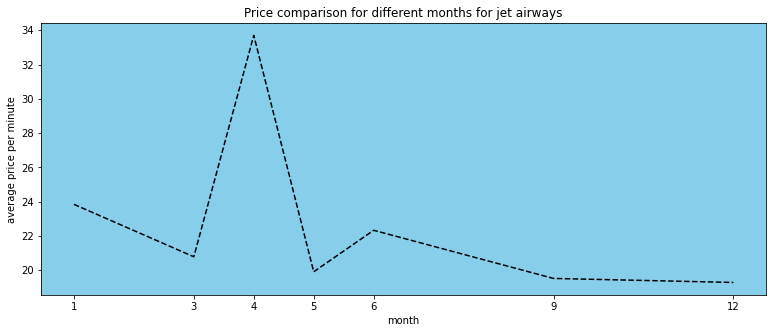

In [434]:
plt.plot(df33['month'],df33['pricepermin'],'m--',color='black')
ax = plt.axes()
  

ax.set_facecolor("skyblue")
plt.rcParams["figure.figsize"] = (13,5)
plt.title('Price comparison for different months for jet airways')
plt.xlabel('month')
values = ['1','3','4','5','6','9','12'] 
plt.xticks(df33['month'],values)

plt.ylabel('average price per minute')
plt.show()

Inference: Average price per minutes for jet airways is larger in month 4

In [435]:
df316=df.loc[df['Airline']=='Air India']
df336 = df316.groupby('month')['pricepermin'].mean().to_frame().reset_index()
df336

,month,pricepermin
0,1,21.010228
1,3,18.729673
2,4,31.157091
3,5,15.014234
4,6,26.853283
5,9,14.943712
6,12,16.807202


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


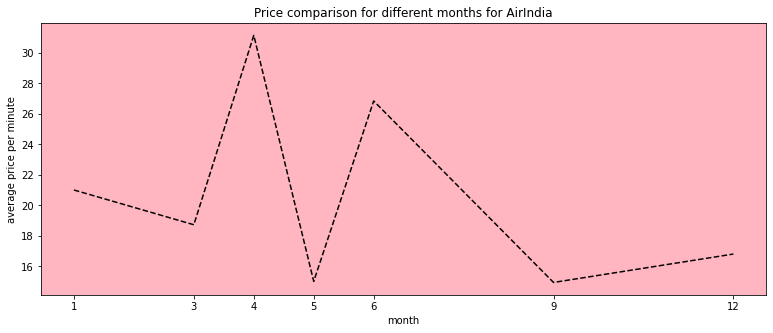

In [436]:
df33=df336
plt.plot(df33['month'],df33['pricepermin'],'m--',color='black')
ax = plt.axes()
  

ax.set_facecolor("lightpink")
plt.rcParams["figure.figsize"] = (13,5)
plt.title('Price comparison for different months for AirIndia')
plt.xlabel('month')
values = ['1','3','4','5','6','9','12'] 
plt.xticks(df33['month'],values)

plt.ylabel('average price per minute')
plt.show()

Inference: Average price per minutes for Air India is larger in month 4

In [437]:
df312=df.loc[df['Airline']=='IndiGo']
df331 = df312.groupby('month')['pricepermin'].mean().to_frame().reset_index()
df331


,month,pricepermin
0,1,33.337136
1,3,28.100344
2,4,24.786198
3,5,22.528026
4,6,24.437931
5,9,24.947537
6,12,25.613653


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


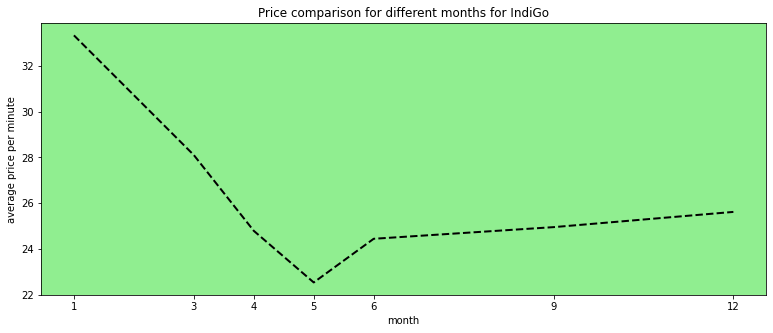

In [456]:
df33=df331
plt.plot(df33['month'],df33['pricepermin'],'m--',color='black',linewidth=2.0)
ax = plt.axes()
  

ax.set_facecolor("lightgreen")
plt.rcParams["figure.figsize"] = (13,5)
plt.title('Price comparison for different months for IndiGo')
plt.xlabel('month')
values = ['1','3','4','5','6','9','12'] 
plt.xticks(df33['month'],values)

plt.ylabel('average price per minute')
plt.show()

Inference: Average price per minutes for Indigo is larger in month 1

In [439]:
df33 = df.groupby('Additional_Info')['pricepermin'].count().to_frame().reset_index()
df33

,Additional_Info,pricepermin
0,1 Long layover,19
1,1 Short layover,1
2,2 Long layover,1
3,Business class,4
4,Change airports,7
5,In-flight meal not included,1982
6,No Info,3
7,No check-in baggage included,320
8,No info,8344
9,Red-eye flight,1


In [440]:
df33=df33.loc[df33['Additional_Info']!='No Info']
df33=df33.loc[df33['Additional_Info']!='No info']
df33

,Additional_Info,pricepermin
0,1 Long layover,19
1,1 Short layover,1
2,2 Long layover,1
3,Business class,4
4,Change airports,7
5,In-flight meal not included,1982
7,No check-in baggage included,320
9,Red-eye flight,1


Text(0.5, 1.0, 'Additional info avialble')

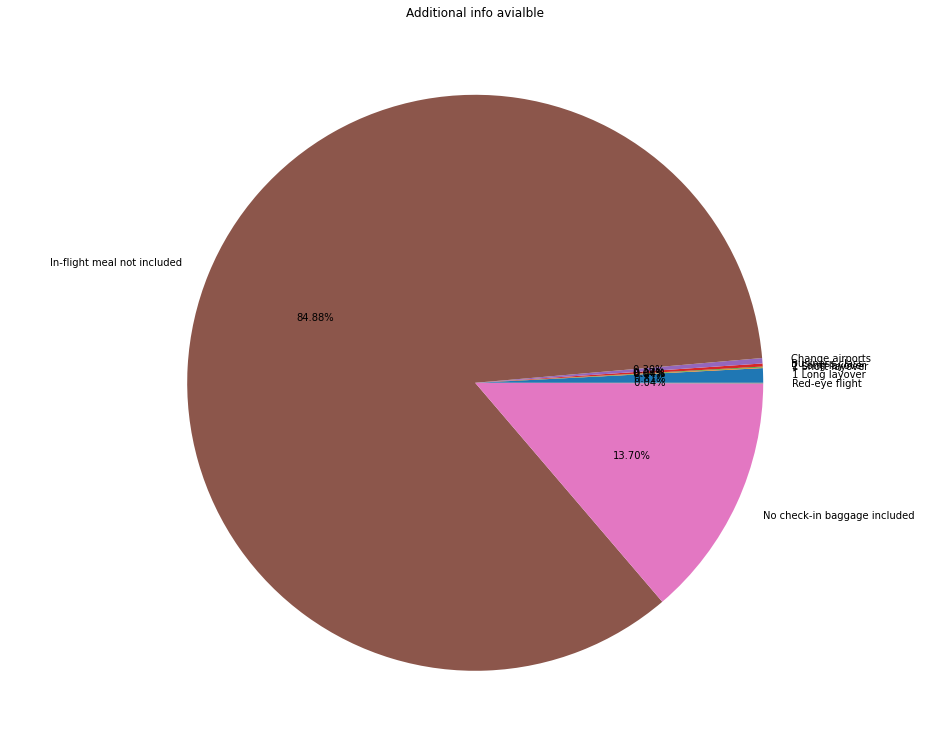

In [441]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,2])
ax.axis('equal')

ax.pie(df33['pricepermin'], labels =df33['Additional_Info'],autopct='%5.2f%%')
plt.title('Additional info avialble')

Inference: Out of the flights whose additional information is available 84 percent does not provide in flight meal

In [442]:

df5 = df.groupby('Airline')['Additional_Info'].count().to_frame().reset_index()
df5

,Airline,Additional_Info
0,Air Asia,319
1,Air India,1751
2,GoAir,194
3,IndiGo,2053
4,Jet Airways,3849
5,Jet Airways Business,6
6,Multiple carriers,1196
7,Multiple carriers Premium economy,13
8,SpiceJet,818
9,Trujet,1


In [443]:
df54=df[df['Additional_Info']=="In-flight meal not included"]#No check-in baggage included
df55 = df54.groupby('Airline')['Additional_Info'].count().to_frame().reset_index()
df55

,Airline,Additional_Info
0,Jet Airways,1886
1,Multiple carriers,96


In [444]:
df56=df5[df5['Airline'].isin(['Jet Airways','Multiple carriers'])].reset_index()
df56.drop(df56.columns[0],axis=1,inplace=True)
df56


,Airline,Additional_Info
0,Jet Airways,3849
1,Multiple carriers,1196


In [445]:
df34=df55
df34['perc']=(df55['Additional_Info']/df56['Additional_Info'])*100;
df34

,Airline,Additional_Info,perc
0,Jet Airways,1886,48.999740
1,Multiple carriers,96,8.026756


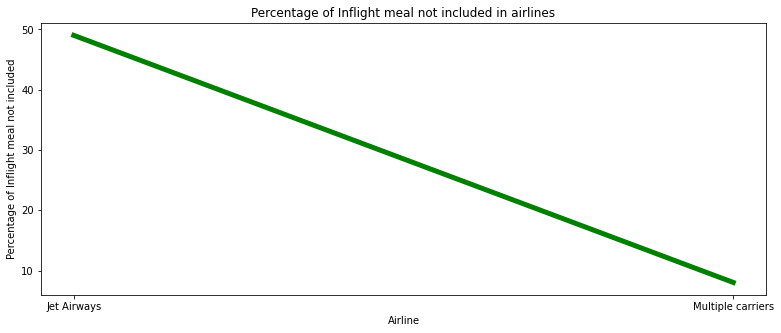

In [459]:
df33=df34
plt.plot(df33['Airline'],df33['perc'],linewidth=5.0,color='green')
plt.rcParams["figure.figsize"] = (13,5)
plt.title('Percentage of Inflight meal not included in airlines')
plt.xlabel('Airline')


plt.ylabel('Percentage of Inflight meal not included')
plt.show()

Inference: Out of the total  flights in jet airways atleast 48.8 percent trips in flight meals is not included

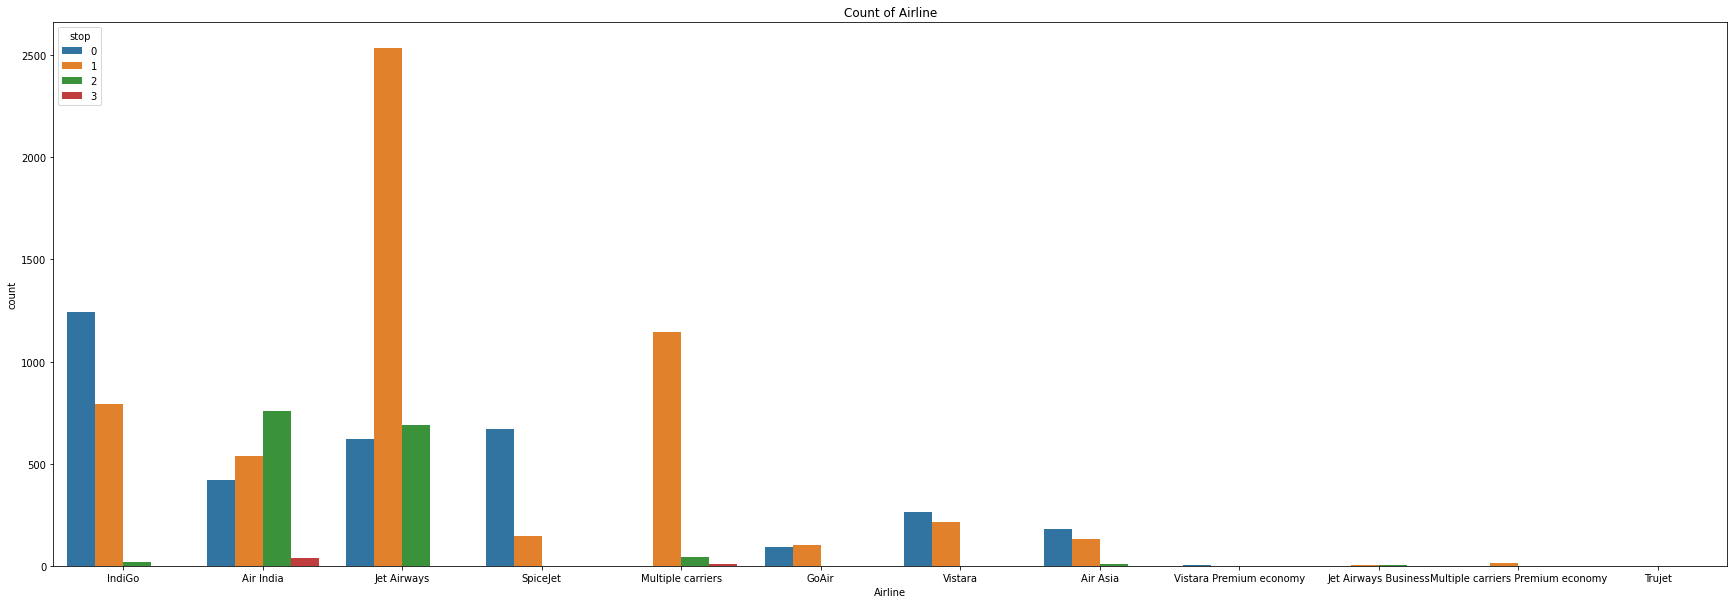

In [447]:
plt.figure(figsize=(30,10))
plt.title('Count of Airline')
sns.countplot(data=df,x='Airline',hue='stop')

Inference: Most trips jet airways has 1 stop in its travel

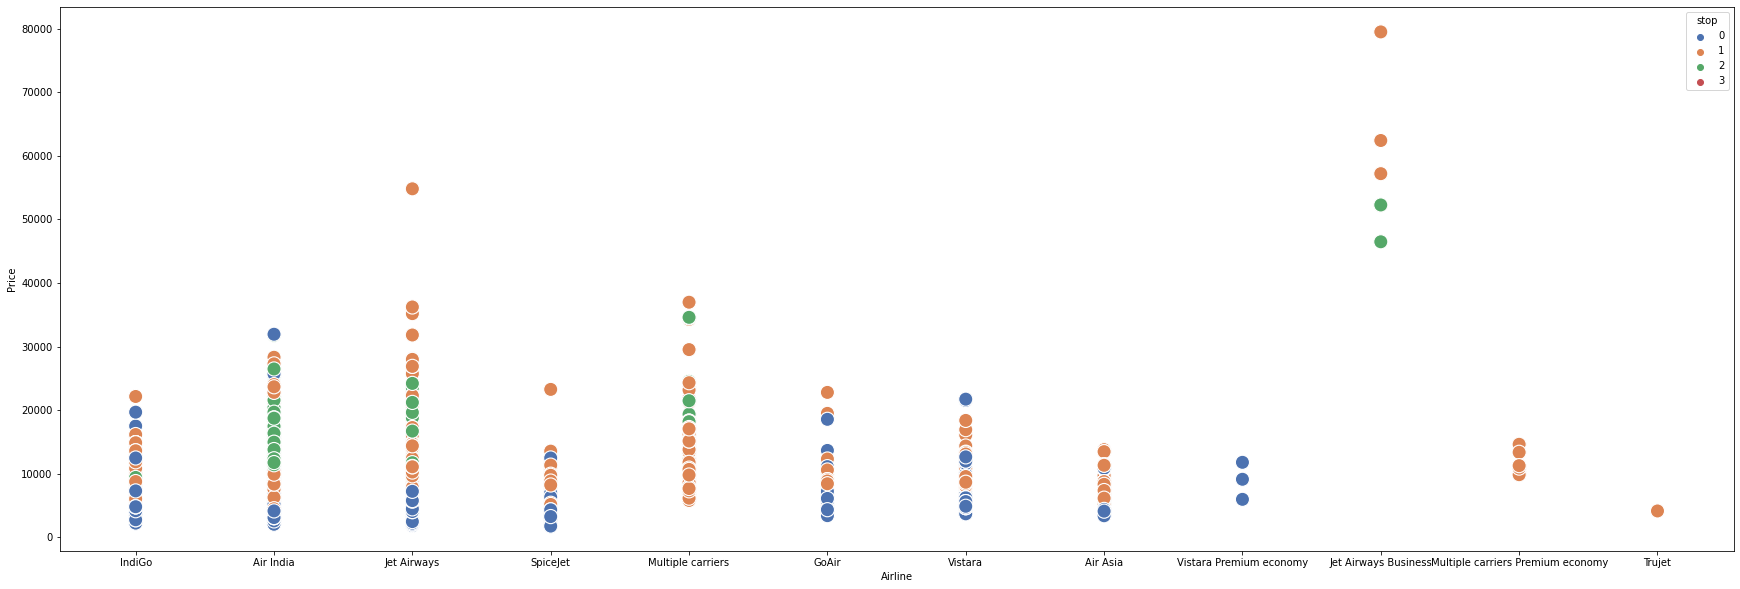

In [448]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=df,x='Airline',y='Price',hue='stop',s=200,palette="deep" )



Inference: For most of the travels with stops 0 fare lies below 20000

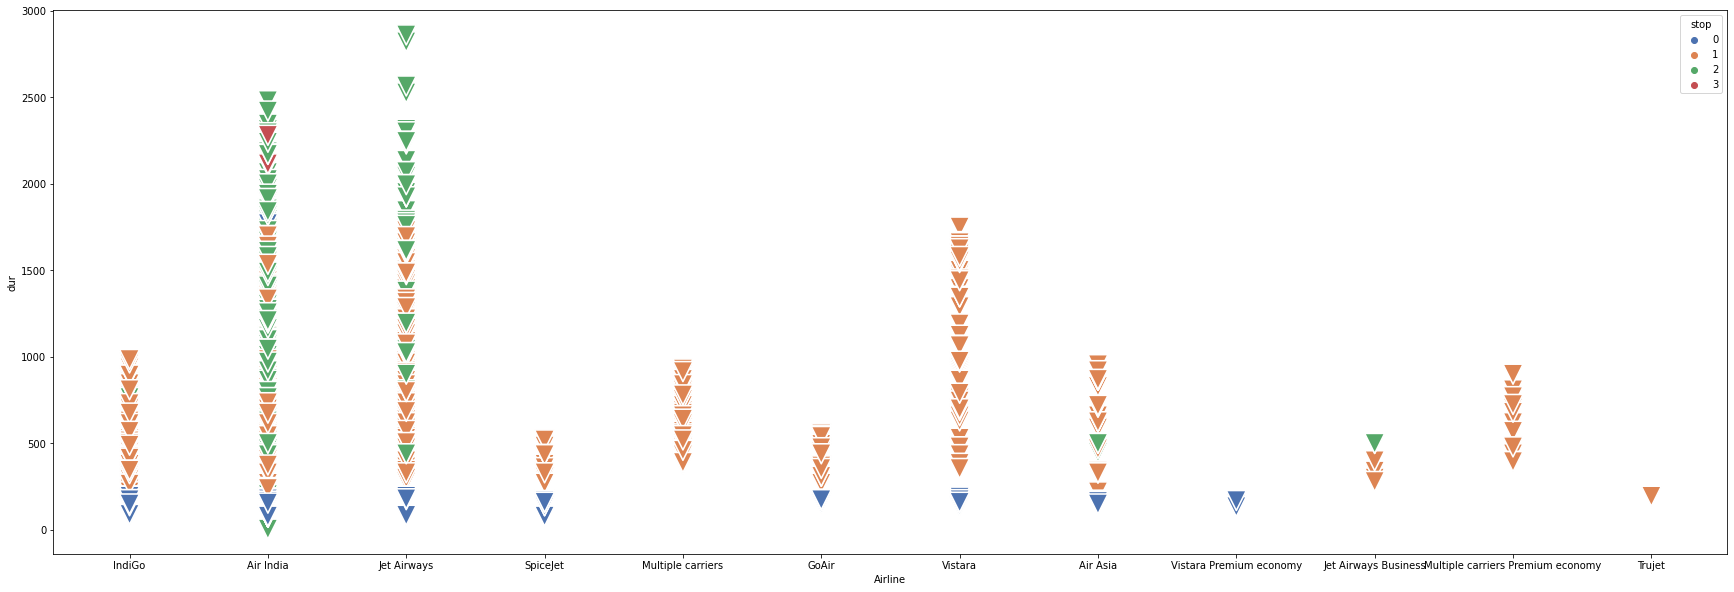

In [449]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=df,x='Airline',y='dur',hue='stop',s=400,palette="deep" ,marker='v')

Inference:For trips with stops 0 travel duraion is below 500 minutes and travels with stops above 1 most of the duration above 250 and between 3000 mins


> Indented block

